In [20]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from transformers import pipeline


import pandas as pd
from transformers import pipeline

# Carica i dati (sostituisci con il percorso del tuo file)
data = pd.read_csv('Recensioni_new.csv')
print(data.shape)
# Funzione per verificare se un elemento è una stringa
def is_string(x):
    return isinstance(x, str)

# Identifica le righe dove 'reviewDescription' non è una stringa
non_string_rows = data['reviewDescription'].apply(lambda x: not is_string(x))

# Elimina le righe non stringa
data = data[~non_string_rows]

print(data.shape)
data.head()

(2258, 6)
(2253, 6)


,country,date,product_name,ratingScore,reviewCategoryUrl,reviewDescription
0,Italy,2022-09-28,"Smac Express - Sgrassatore Disinfettante, Dete...",3,https://www.amazon.com/product-reviews/B08SXYZ...,Costano meno che al supermercato è il profumo ...
1,Italy,2021-08-24,"Smac Express - Sgrassatore Disinfettante, Dete...",3,https://www.amazon.com/product-reviews/B08SXYZ...,"Sgassatore davvero ottimo, sgrassa al 100% tut..."
2,Italy,2023-09-20,"Smac Express - Sgrassatore Universale, Deterge...",5,https://www.amazon.com/product-reviews/B08VKBW...,Ho avuto l'opportunità di utilizzare lo sgrass...
3,Italy,2023-10-17,"Smac Express - Sgrassatore Universale, Deterge...",5,https://www.amazon.com/product-reviews/B08VKBW...,"Ottimo sgrassatore, non lascia aloni e pulisce..."
4,Italy,2023-09-11,"Smac Express - Sgrassatore Universale, Deterge...",5,https://www.amazon.com/product-reviews/B08VKBW...,Ottimo Prodotto 👍


In [21]:
# Sentiment analysis con il modello BERT in italiano
classifier = pipeline('sentiment-analysis', model='neuraly/bert-base-italian-cased-sentiment')

def get_sentiment(text):
    # Converti il testo in stringa in modo esplicito
    text = str(text)

    # Passa direttamente il testo alla pipeline
    result = classifier(text, truncation=True)
    return result[0]['label']

data['sentiment'] = data['reviewDescription'].apply(get_sentiment)

In [22]:
data.head()

,country,date,product_name,ratingScore,reviewCategoryUrl,reviewDescription,sentiment
0,Italy,2022-09-28,"Smac Express - Sgrassatore Disinfettante, Dete...",3,https://www.amazon.com/product-reviews/B08SXYZ...,Costano meno che al supermercato è il profumo ...,positive
1,Italy,2021-08-24,"Smac Express - Sgrassatore Disinfettante, Dete...",3,https://www.amazon.com/product-reviews/B08SXYZ...,"Sgassatore davvero ottimo, sgrassa al 100% tut...",positive
2,Italy,2023-09-20,"Smac Express - Sgrassatore Universale, Deterge...",5,https://www.amazon.com/product-reviews/B08VKBW...,Ho avuto l'opportunità di utilizzare lo sgrass...,positive
3,Italy,2023-10-17,"Smac Express - Sgrassatore Universale, Deterge...",5,https://www.amazon.com/product-reviews/B08VKBW...,"Ottimo sgrassatore, non lascia aloni e pulisce...",positive
4,Italy,2023-09-11,"Smac Express - Sgrassatore Universale, Deterge...",5,https://www.amazon.com/product-reviews/B08VKBW...,Ottimo Prodotto 👍,positive


In [32]:
data.to_csv('Recensioni_new_sentiment.csv', index=False)

<center>

# Fino a qui ho il dataset con i sentimenti top

</center>


Cloudword per tutte le marche

In [48]:
import pandas as pd
data = pd.read_csv('Recensioni_new_sentiment.csv')

# Estrazione di parole e frasi comuni
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('italian'))

# Lista di parole da escludere
exclude_words = {'senza', 'molto', 'poco', 'sempre', 'davvero', "ok", "già", "solo",  "quindi", "dopo", "fa", "troppo", "me", "comunque", "x", "poi", "altri", "stato", "po'", "po", "va", "via", "davvero", "te", "così"} # Aggiungi altre parole qui

def preprocess(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words and word not in exclude_words]
    return words


def get_common_words(data, sentiment):
    words = []
    for review in data[data['sentiment'] == sentiment]['reviewDescription']:
        processed_words = preprocess(review)  # Applica il preprocessamento qui
        words.extend(processed_words)
    return Counter(words).most_common(100)

common_positive_words = get_common_words(data, 'positive')
common_negative_words = get_common_words(data, 'negative')
common_neutral_words = get_common_words(data, 'neutral')

print("Parole comuni nelle recensioni positive:", common_positive_words)
print("Parole comuni nelle recensioni negative:", common_negative_words)
print("Parole comuni nelle recensioni neutre:", common_neutral_words)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

def create_and_save_word_cloud(word_freq, title, save_path):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    
    # Salva il grafico
    plt.savefig(save_path)
    plt.close()  # Chiudi la figura per liberare memoria

# Directory in cui salvare i grafici
save_directory = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi recensioni/Sentiment/Cloud_words'

# Assicurati che la directory esista, altrimenti creala
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Crea e salva i Word Clouds
create_and_save_word_cloud(common_positive_words, 'Common Words in Positive Reviews', os.path.join(save_directory, 'positive_reviews_wordcloud.png'))
create_and_save_word_cloud(common_negative_words, 'Common Words in Negative Reviews', os.path.join(save_directory, 'negative_reviews_wordcloud.png'))
create_and_save_word_cloud(common_neutral_words, 'Common Words in Neutral Reviews', os.path.join(save_directory, 'neutral_reviews_wordcloud.png'))


Cloudword solo per i sentimenti di ACE

In [13]:
data = pd.read_csv('Recensioni_new_sentiment.csv')

import pandas as pd
import re
import nltk

# Lista delle marche da cercare
marche = ["Smac", "Cif", "Chanteclair", "Quasar", "Ace", "Vetril", "Winni's", "Lysoform", "Amuchina"]

# Funzione per trovare la marca in una stringa
def find_marca(product_name):
    for marca in marche:
        # Uso di regex per trovare la marca come parola a sé stante (case insensitive)
        if re.search(r'\b' + re.escape(marca) + r'\b', product_name, re.IGNORECASE):
            return marca
    # Se non viene trovata nessuna marca, restituire un valore predefinito o NaN
    return "Marca non trovata"  # O puoi usare pd.NA per NaN

# Applica la funzione alla colonna product_name per creare la nuova colonna Marca
data['Marca'] = data['product_name'].apply(find_marca)
data.head()

#data è data per cui marca è Ace
data = data[data['Marca'] == 'Ace']

# Estrazione di parole e frasi comuni
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop_words = set(stopwords.words('italian'))

# Lista di parole da escludere
exclude_words = {'senza', 'molto', 'poco', 'sempre', 'davvero', "ok", "già", "ricarica", "ricariche", "solo",  "quindi", "dopo", "fa", "troppo", "me", "comunque", "x", "poi", "altri", "stato", "po'", "po", "va", "via", "davvero", "te", "così"} # Aggiungi altre parole qui

def preprocess(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words and word not in exclude_words]
    return words


def get_common_words(data, sentiment):
    words = []
    for review in data[data['sentiment'] == sentiment]['reviewDescription']:
        processed_words = preprocess(review)  # Applica il preprocessamento qui
        words.extend(processed_words)
    return Counter(words).most_common(100)

common_positive_words = get_common_words(data, 'positive')
common_negative_words = get_common_words(data, 'negative')
common_neutral_words = get_common_words(data, 'neutral')

print("Parole comuni nelle recensioni positive:", common_positive_words)
print("Parole comuni nelle recensioni negative:", common_negative_words)
print("Parole comuni nelle recensioni neutre:", common_neutral_words)

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

def create_and_save_word_cloud(word_freq, title, save_path):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_freq))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    
    # Salva il grafico
    plt.savefig(save_path)
    plt.close()  # Chiudi la figura per liberare memoria

# Directory in cui salvare i grafici
save_directory = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi recensioni/Sentiment/Cloud_words'

# Assicurati che la directory esista, altrimenti creala
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Crea e salva i Word Clouds
create_and_save_word_cloud(common_positive_words, 'Common Words in Positive Reviews: ACE', os.path.join(save_directory, 'positive_reviews_wordcloud_ACE.png'))
create_and_save_word_cloud(common_negative_words, 'Common Words in Negative Reviews: ACE', os.path.join(save_directory, 'negative_reviews_wordcloud_ACE.png'))
create_and_save_word_cloud(common_neutral_words, 'Common Words in Neutral Reviews: ACE', os.path.join(save_directory, 'neutral_reviews_wordcloud_ACE.png'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/peppus00/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Parole comuni nelle recensioni positive: [('prodotto', 88), ('ottimo', 58), ('bene', 30), ('profumo', 30), ('prezzo', 27), ('ace', 22), ('candeggina', 22), ('buon', 20), ('bagno', 19), ('sgrassatore', 15), ('pulizia', 14), ('uso', 14), ('plastica', 14), ('macchie', 13), ('pulisce', 13), ('consiglio', 12), ('muffa', 12), ('quando', 11), ('usato', 11), ('può', 11), ('superfici', 11), ('sgrassa', 11), ('amazon', 10), ('liquida', 10), ('pulito', 10), ('capi', 10), ('flacone', 10), ('cucina', 10), ('lascia', 10), ('sporco', 10), ('ottima', 10), ('buono', 10), ('doccia', 10), ('meno', 10), ('prodotti', 10), ('efficace', 10), ('utilizzo', 9), ('bianchi', 9), ('bucato', 9), ('prima', 9), ('lavatrice', 9), ('facile', 9), ('rimuovere', 9), ('acquistato', 9), ('casa', 8), ('lavaggio', 8), ('grazie', 8), ('piace', 8), ('mai', 8), ('essere', 8), ('qualità', 8), ('pratico', 8), ('acqua', 8), ('anticalcare', 8), ('forte', 8), ('meglio', 7), ('profumato', 7), ('super', 7), ('formato', 7), ('pulire', 7

Ora faccio divisione per marca e capisco sentimenti per ogni marca

In [36]:
data = pd.read_csv('Recensioni_new_sentiment.csv')

import pandas as pd
import re

# Lista delle marche da cercare
marche = ["Smac", "Cif", "Chanteclair", "Quasar", "Ace", "Vetril", "Winni's", "Lysoform", "Amuchina"]

# Funzione per trovare la marca in una stringa
def find_marca(product_name):
    for marca in marche:
        # Uso di regex per trovare la marca come parola a sé stante (case insensitive)
        if re.search(r'\b' + re.escape(marca) + r'\b', product_name, re.IGNORECASE):
            return marca
    # Se non viene trovata nessuna marca, restituire un valore predefinito o NaN
    return "Marca non trovata"  # O puoi usare pd.NA per NaN

# Applica la funzione alla colonna product_name per creare la nuova colonna Marca
data['Marca'] = data['product_name'].apply(find_marca)
data.head()

# Raggruppa per Marca e sentiment, e poi conta le occorrenze
sentiment_counts = data.groupby(['Marca', 'sentiment']).size().unstack(fill_value=0)

# Calcola il totale delle recensioni per ogni marca
sentiment_counts['Total'] = sentiment_counts.sum(axis=1)

# Calcola le percentuali
for sentiment in ['positive', 'negative', 'neutral']:
    sentiment_counts[f'{sentiment}_perc'] = (sentiment_counts[sentiment] / sentiment_counts['Total']) * 100

# Rimuovi la colonna 'Total' se non necessaria
sentiment_counts.drop('Total', axis=1, inplace=True)

print(sentiment_counts)

import matplotlib.pyplot as plt
import pandas as pd

# Creazione del DataFrame (sostituire con il tuo DataFrame effettivo)
data = pd.DataFrame({
    'Marca': ['Ace', 'Amuchina', 'Chanteclair', 'Cif', 'Lysoform', 'Quasar', 'Smac', 'Vetril', 'Winni\'s'],
    'positive_perc': [73.76, 76.79, 69.57, 72.87, 81.40, 82.27, 82.75, 84.81, 84.02],
    'negative_perc': [19.86, 18.75, 19.02, 22.07, 10.08, 17.02, 11.22, 6.33, 12.43],
    'neutral_perc': [6.38, 4.46, 11.41, 5.05, 8.53, 0.71, 6.03, 8.86, 3.55]
}).set_index('Marca')

# Ordina i dati in base alla percentuale di recensioni positive
data_sorted = data.sort_values(by='negative_perc', ascending=True)

# Creazione del grafico a barre impilato con i dati ordinati
ax = data_sorted.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Aggiungi didascalie e titolo
plt.title('Percentuali di Sentiment per Marca (Ordinate per Recensioni Negative)')
plt.xlabel('Marca')
plt.ylabel('Percentuale (%)')
plt.xticks(rotation=45)

# Mostra il grafico
plt.tight_layout()

# Salva il grafico
save_path = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi recensioni/Sentiment/grafico_sentiment.png'
plt.savefig(save_path)

plt.show()


Evoluzione rating score nel tempo per ogni marca

Grafico salvato in: /Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi recensioni/Evoluzione_rating/rating_evolution_chart.png


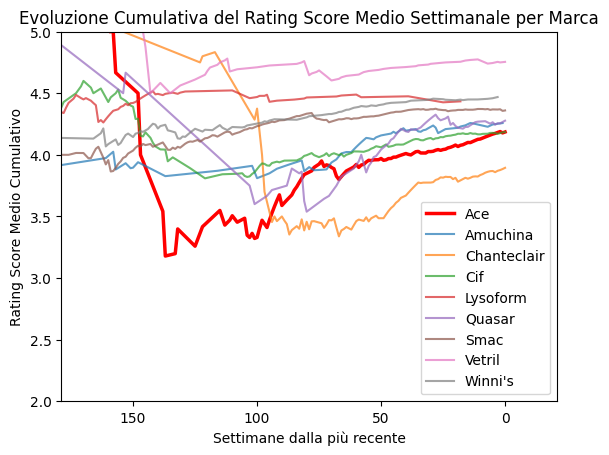

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

df = pd.read_csv('Recensioni_new_sentiment.csv')
df.head()
df.rename(columns={'date': 'Data'}, inplace=True)
#if the value in Immagini is Nan, then it is replaced with 0, otherwise 1
df['Data'] = pd.to_datetime(df['Data'])

# Trovare la data più recente
data_piu_recente = df['Data'].max()

# Calcolare il numero di giorni dalla data più recente
df['Giorni_dalla_data_piu_recente'] = (data_piu_recente - df['Data']).dt.days
#drop the column Data
df = df.drop(columns=['Data'])
df.head()

# Lista delle marche da cercare
marche = ["Smac", "Cif", "Chanteclair", "Quasar", "Ace", "Vetril", "Winni's", "Lysoform", "Amuchina"]

# Funzione per trovare la marca in una stringa
def find_marca(product_name):
    for marca in marche:
        # Uso di regex per trovare la marca come parola a sé stante (case insensitive)
        if re.search(r'\b' + re.escape(marca) + r'\b', product_name, re.IGNORECASE):
            return marca
    # Se non viene trovata nessuna marca, restituire un valore predefinito o NaN
    return "Marca non trovata"  # O puoi usare pd.NA per NaN

# Applica la funzione alla colonna product_name per creare la nuova colonna Marca
df['Marca'] = df['product_name'].apply(find_marca)
df.head()

# Calcola la settimana corrispondente a ciascun giorno
df['Settimana'] = df['Giorni_dalla_data_piu_recente'] // 7

# Trova il numero massimo di settimane e inverti i valori della settimana
max_week = df['Settimana'].max()
df['Settimana_invertita'] = max_week - df['Settimana']

# Raggruppa per Marca e Settimana_invertita e calcola la media del ratingScore
grouped_data = df.groupby(['Marca', 'Settimana_invertita'])['ratingScore'].mean().reset_index()

# Calcola la media cumulativa del ratingScore per ogni marca
grouped_data['ratingScore_cumulative'] = grouped_data.groupby('Marca')['ratingScore'].expanding().mean().reset_index(level=0, drop=True)

# Filtra per includere solo le settimane da 200 in poi
grouped_data_filtered = grouped_data[grouped_data['Settimana_invertita'] >= 200]

# Creazione del grafico
for marca in grouped_data_filtered['Marca'].unique():
    marca_data = grouped_data_filtered[grouped_data_filtered['Marca'] == marca]
    if marca == 'Ace':
        plt.plot(marca_data['Settimana_invertita'], marca_data['ratingScore_cumulative'], label=marca, linewidth=2.5, color='red')
    else:
        plt.plot(marca_data['Settimana_invertita'], marca_data['ratingScore_cumulative'], label=marca, alpha=0.7)

plt.xlabel('Settimane dalla più recente')
plt.ylabel('Rating Score Medio Cumulativo')
plt.title('Evoluzione Cumulativa del Rating Score Medio Settimanale per Marca')
plt.ylim(2, 5)
plt.legend()

# Calcola il numero massimo di settimane
max_week = df['Settimana'].max()

# Crea manualmente i tick e le etichette per l'asse x
tick_labels = {max_week - i: str(i) for i in range(0, max_week + 1, 50)}
plt.xticks(list(tick_labels.keys()), list(tick_labels.values()))
plt.xlim(250, 450)


# Salva il grafico prima di mostrarlo
save_path = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi recensioni/Evoluzione_rating/rating_evolution_chart.png'
plt.savefig(save_path)
print(f"Grafico salvato in: {save_path}")

# Mostra il grafico
plt.show()

# Chiudi la figura per liberare memoria
plt.close()

Evoluzione sentimenti nel tempo per ogni marca

Grafico salvato in: /Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi recensioni/Evoluzione_rating/sentiment_evolution_chart.png


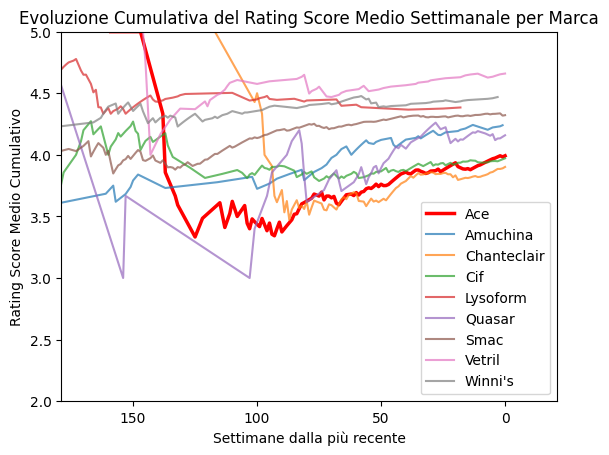

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

df = pd.read_csv('Recensioni_new_sentiment.csv')
df.rename(columns={'date': 'Data'}, inplace=True)
df['Data'] = pd.to_datetime(df['Data'])

# Trovare la data più recente e calcolare i giorni dalla data più recente
data_piu_recente = df['Data'].max()
df['Giorni_dalla_data_piu_recente'] = (data_piu_recente - df['Data']).dt.days

# Lista delle marche e funzione per trovare la marca
marche = ["Smac", "Cif", "Chanteclair", "Quasar", "Ace", "Vetril", "Winni's", "Lysoform", "Amuchina"]
def find_marca(product_name):
    for marca in marche:
        if re.search(r'\b' + re.escape(marca) + r'\b', product_name, re.IGNORECASE):
            return marca
    return "Marca non trovata"
df['Marca'] = df['product_name'].apply(find_marca)

# Converte i valori di sentiment in un punteggio numerico
sentiment_scores = {'positive': 5, 'neutral': 3, 'negative': 1}
df['sentiment_score'] = df['sentiment'].map(sentiment_scores)

# Calcola la settimana e inverti i valori della settimana
df['Settimana'] = df['Giorni_dalla_data_piu_recente'] // 7
max_week = df['Settimana'].max()
df['Settimana_invertita'] = max_week - df['Settimana']

# Raggruppa per Marca e Settimana_invertita e calcola la media del sentiment score
grouped_data = df.groupby(['Marca', 'Settimana_invertita'])['sentiment_score'].mean().reset_index()

# Calcola la media cumulativa del sentiment score per ogni marca
grouped_data['sentiment_score_cumulative'] = grouped_data.groupby('Marca')['sentiment_score'].expanding().mean().reset_index(level=0, drop=True)

# Filtra per includere solo le settimane da 200 in poi
grouped_data_filtered = grouped_data[grouped_data['Settimana_invertita'] >= 200]

# Creazione del grafico
for marca in grouped_data_filtered['Marca'].unique():
    marca_data = grouped_data_filtered[grouped_data_filtered['Marca'] == marca]
    if marca == 'Ace':
        plt.plot(marca_data['Settimana_invertita'], marca_data['sentiment_score_cumulative'], label=marca, linewidth=2.5, color='red')
    else:
        plt.plot(marca_data['Settimana_invertita'], marca_data['sentiment_score_cumulative'], label=marca, alpha=0.7)

plt.xlabel('Settimane dalla più recente')
plt.ylabel('Rating Score Medio Cumulativo')
plt.title('Evoluzione Cumulativa del Rating Score Medio Settimanale per Marca')
plt.ylim(2, 5)
plt.legend()

# Calcola il numero massimo di settimane
max_week = df['Settimana'].max()

# Crea manualmente i tick e le etichette per l'asse x
tick_labels = {max_week - i: str(i) for i in range(0, max_week + 1, 50)}
plt.xticks(list(tick_labels.keys()), list(tick_labels.values()))
plt.xlim(250, 450)

# Salva il grafico prima di mostrare
save_path = '/Users/peppus00/Desktop/Progetto ARM/Analisi dati/Analisi recensioni/Evoluzione_rating/sentiment_evolution_chart.png'
plt.savefig(save_path)
print(f"Grafico salvato in: {save_path}")

# Mostra il grafico
plt.show()

# Chiudi la figura per liberare memoria
plt.close()
